# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

<function matplotlib.pyplot.show(*args, **kw)>

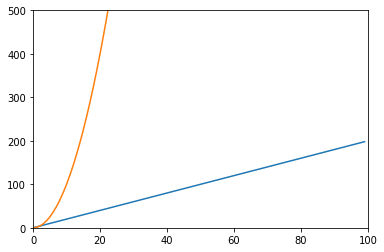

In [3]:
plt.plot(y)
plt.plot(z)
plt.axis([0, 100, 0, 500])
plt.show

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

<function matplotlib.pyplot.show(*args, **kw)>

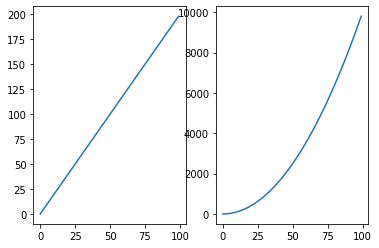

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True)
ax1.plot(x, y)
ax2.plot(x, z)
plt.show

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

<function matplotlib.pyplot.show(*args, **kw)>

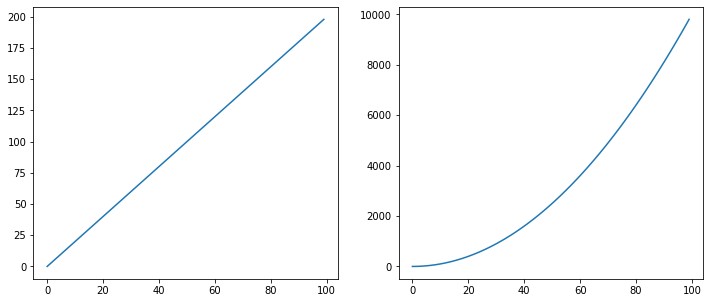

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=[12.0, 5.0])
ax1.plot(x, y)
ax2.plot(x, z)
plt.show

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

<function matplotlib.pyplot.show(*args, **kw)>

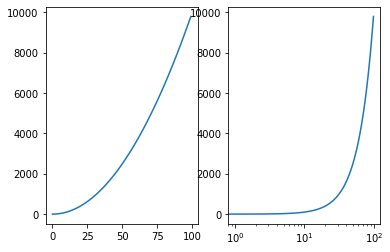

In [6]:
plt.subplot(121)
plt.plot(x, z)
plt.subplot(122)
plt.plot(x, z)
plt.xscale('log')
plt.show

#### As a bonus challenge, try to add a legend to the plot.

<function matplotlib.pyplot.show(*args, **kw)>

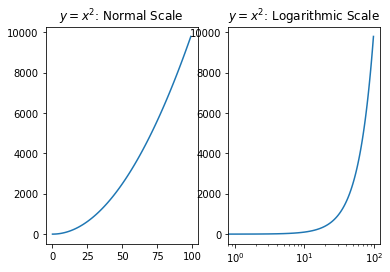

In [7]:
fig = plt.figure()
fig.tight_layout(pad=4)
plt.subplot(121)
plt.plot(x, z)
plt.title('$y = x^2$: Normal Scale')
plt.subplot(122)
plt.plot(x, z)
plt.title('$y = x^2$: Logarithmic Scale')
plt.xscale('log')
plt.show

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit = pd.read_csv('Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [9]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

In [10]:
fitbit[['Days', 'Work_or_Weekend']]

,Days,Work_or_Weekend
0,Friday,1
1,Saturday,0
2,Sunday,0
3,Monday,1
4,Tuesday,1
...,...,...
362,Tuesday,1
363,Wednesday,1
364,Thursday,1
365,Friday,1


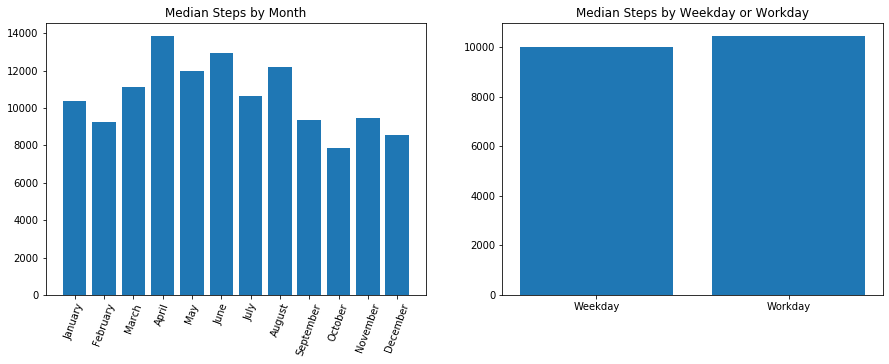

In [14]:
# MEDIAN STEPS BY MONTH_ENCODED
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fitbit['Months'] = pd.Categorical(fitbit['Months'], categories = months, ordered=True)
median_steps_month = fitbit.groupby('Months')['Steps'].median().sort_index()
fig = plt.figure(figsize=[15, 5])
plt.subplot(121)
plt.bar(median_steps_month.index, median_steps_month)
plt.title('Median Steps by Month')
locs, labels = plt.xticks()
plt.xticks(locs, median_steps_month.index, rotation=70)
# MEDIAN STEPS BY WORK_OR_WEEKEND
median_steps_work_weekend = fitbit.groupby('Work_or_Weekend')['Steps'].median()
plt.subplot(122)
plt.bar(['Weekday', 'Workday'], median_steps_work_weekend)
plt.title('Median Steps by Weekday or Workday')
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

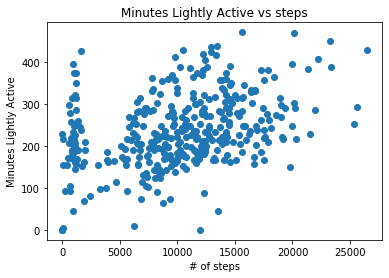

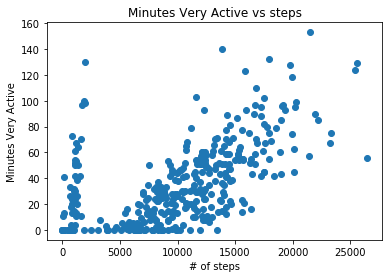

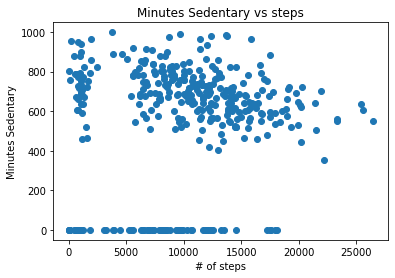

In [19]:
cols = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
for col in cols:
    plt.scatter(fitbit['Steps'], fitbit[col])
    plt.title('%s vs steps' % col)
    plt.xlabel('# of steps')
    plt.ylabel(col)
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [20]:
titanic = pd.read_csv('titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [21]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [22]:
# NUMERICAL VARIABLES
titanic.select_dtypes('number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [24]:
# CATEGORICAL VARIABLES
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [25]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['figure.figsize'] = [12.0, 6.0]

#### Use the right visulalization to show the distribution of column `Age`.

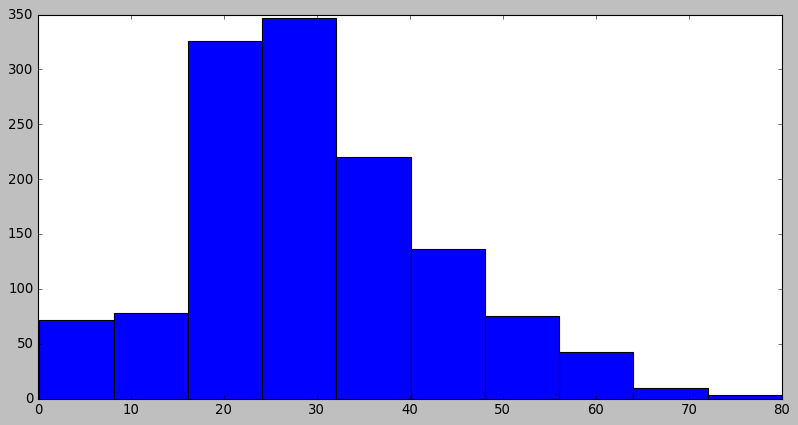

In [30]:
plt.hist(titanic['Age'])
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

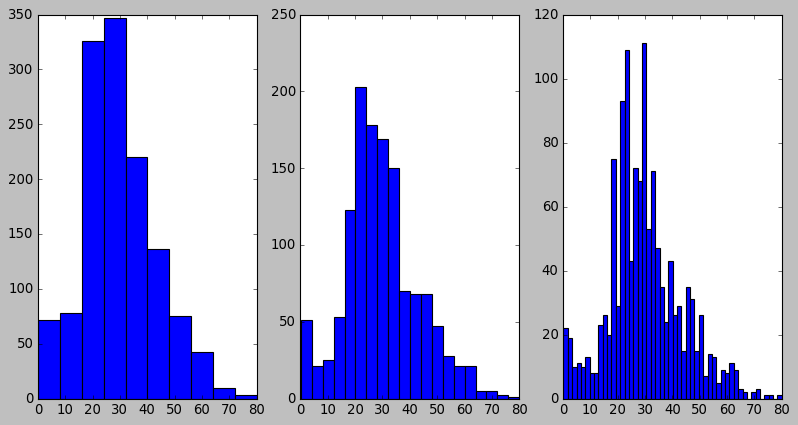

In [33]:
plt.subplot(131)
plt.hist(titanic.Age, bins=10)
plt.subplot(132)
plt.hist(titanic.Age, bins=20)
plt.subplot(133)
plt.hist(titanic.Age, bins=50)
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
The size "denormalize" the distribution with more bins specified, making it more difficult to interpret the general distribution of the data.
"""

#### Use seaborn to show the distribution of column `Age`.

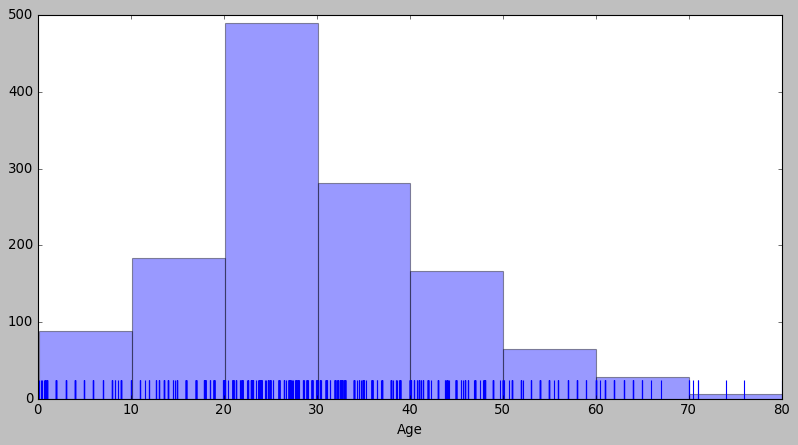

In [36]:
sb.distplot(titanic.Age, kde=False, rug=True, bins=8)
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

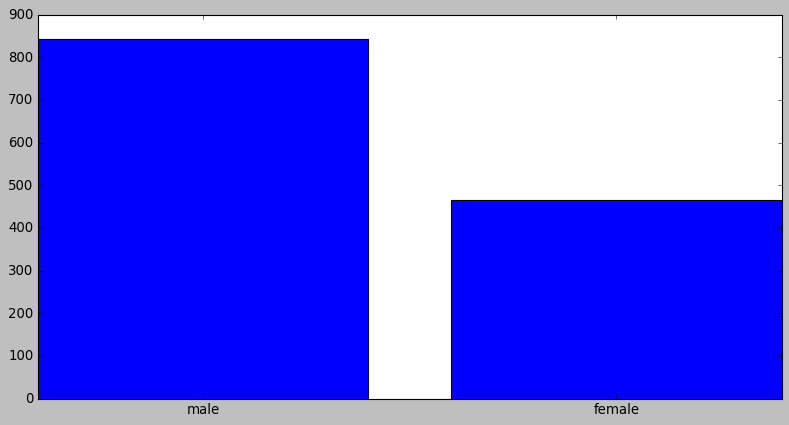

In [42]:
# Method 1 - matplotlib
gender_count = titanic.Gender.value_counts()
plt.bar(gender_count.index, gender_count)
plt.show()

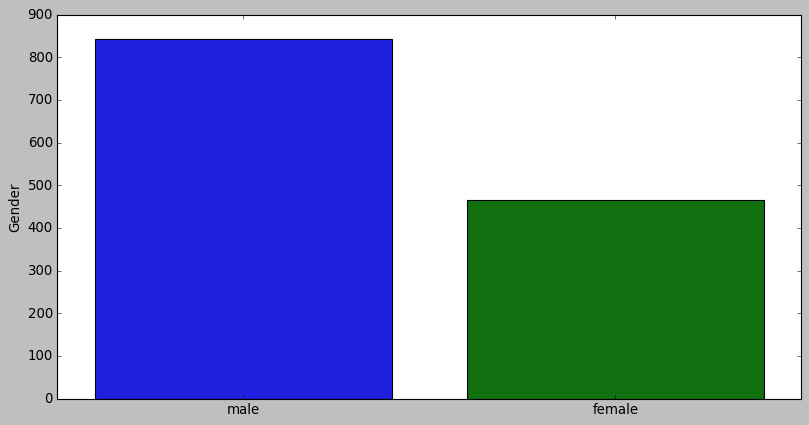

In [44]:
# Method 2 - seaborn
sb.barplot(gender_count.index, gender_count)
plt.show()

#### Use the right plot to visualize the column `Pclass`.

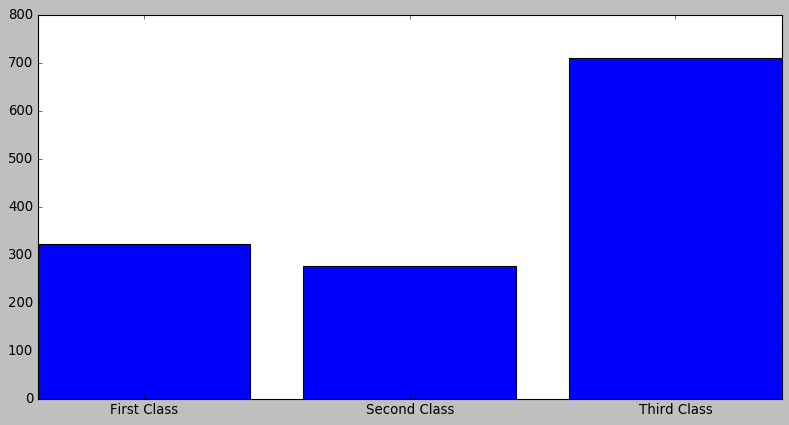

In [54]:
class_count = titanic.Pclass.value_counts().sort_index()
plt.bar(['First Class', 'Second Class', 'Third Class'], class_count)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

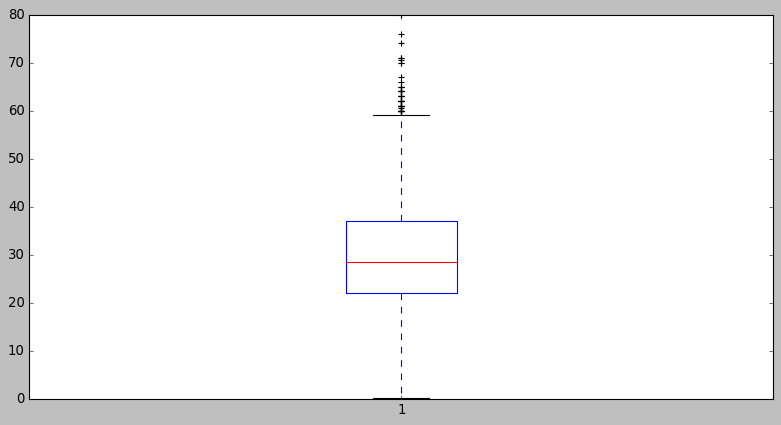

In [56]:
plt.boxplot(titanic.Age)
plt.show()

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The passengers' ages were normally distributed, vast majority of which was between 20 and 40 years old. 
Every passenger with more than 60 y/o is considered an outlier.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

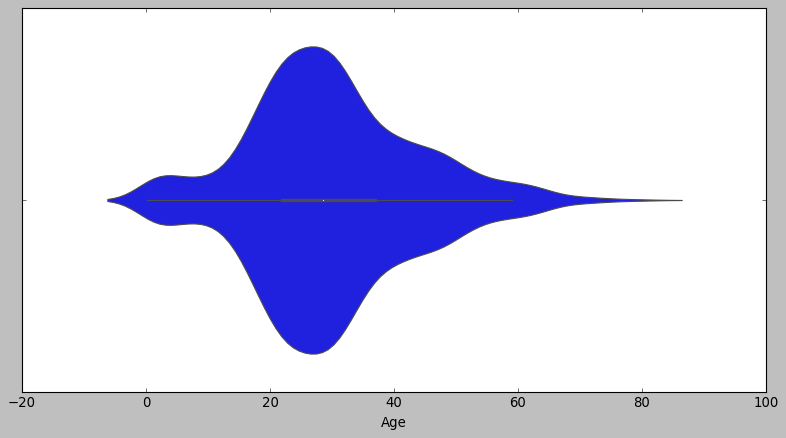

In [58]:
sb.violinplot(titanic.Age)
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Apparently we have some corrupte data since we have some ages below 0.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

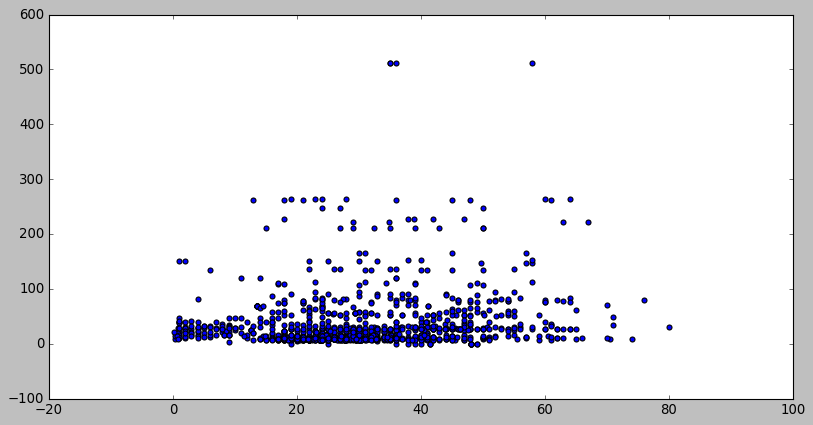

In [59]:
# Method 1 - matplotlib
plt.scatter(titanic.Age, titanic.Fare)
plt.show()

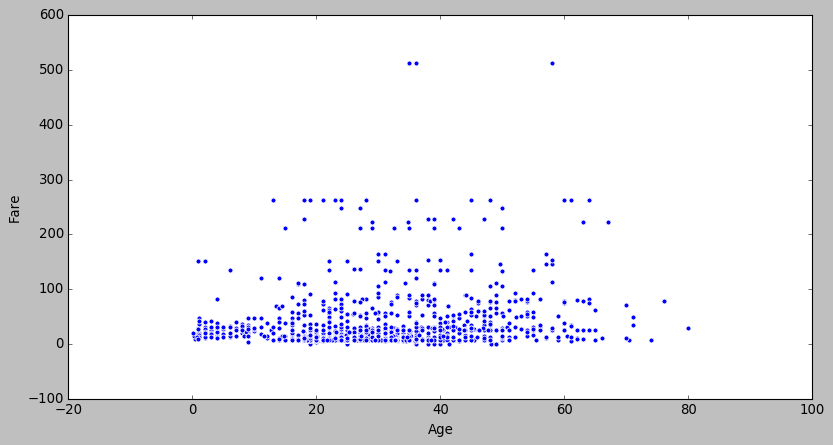

In [61]:
# Method 2 - seaborn
sb.scatterplot(titanic.Age, titanic.Fare)
plt.show()

#### Plot the correlation matrix using seaborn.

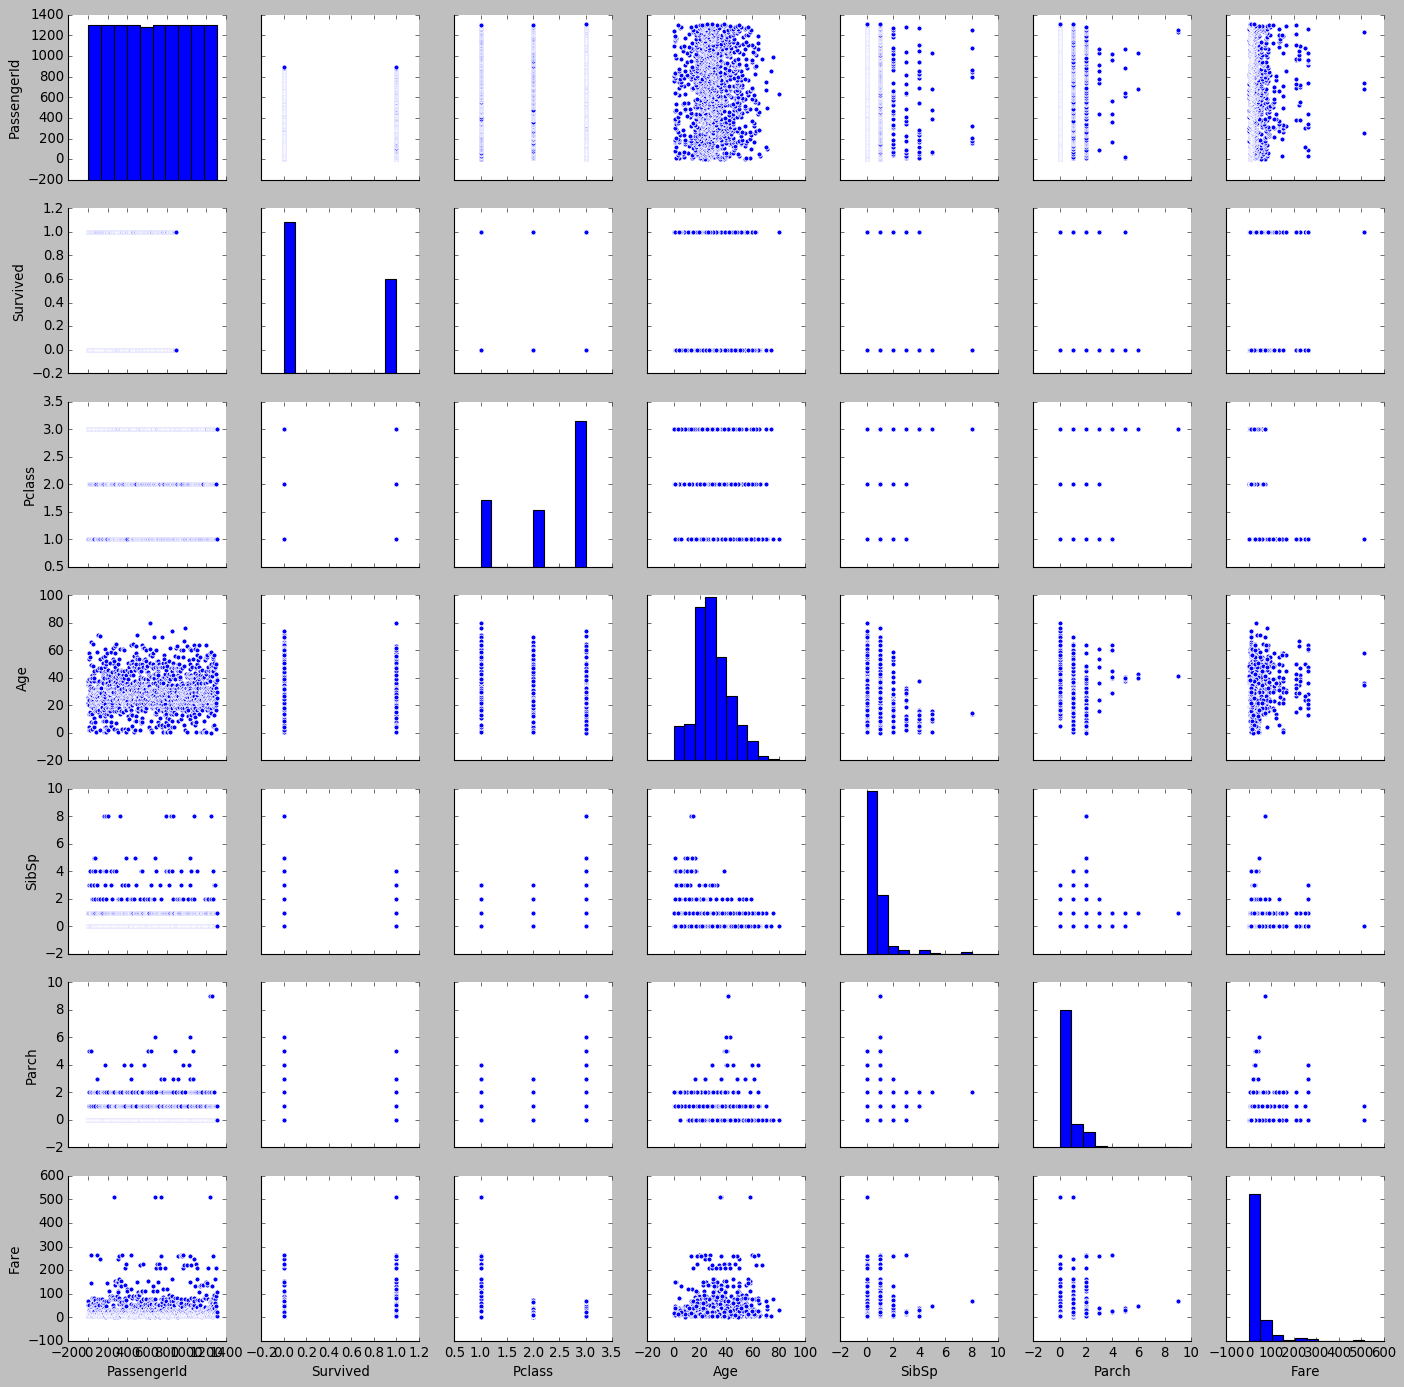

In [63]:
sb.pairplot(titanic)
plt.show()

#### What are the most correlated features?

In [ ]:
"""
Actually the only features that can be compared are only Age and Fare, that we already saw they did not present any particular correlation. All the others variables are not really quantitative, so they do not count. """

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

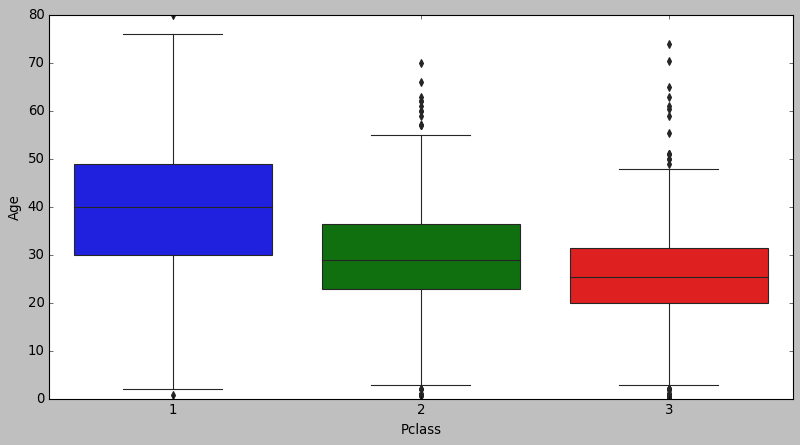

In [69]:
sb.boxplot(titanic.Pclass, titanic.Age)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

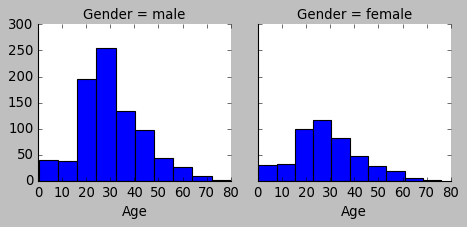

In [72]:
graph = sb.FacetGrid(titanic, col='Gender')
graph.map(plt.hist, 'Age')
plt.show()